In [2]:
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from tensorflow.keras.regularizers import l1, l2, L1L2



In [ ]:
#delete once we are sure that our preprocessing method is ready. 
# # smote and upsampling + validation set pulled from training set (now we have data leakage)
# filepath_files = '/Users/krahman/work/tutorials/tensorflow_classification/data/'

# train_samples = pd.read_csv(filepath_files + 'mod_x_train.csv').drop('Unnamed: 0', axis=1)
# train_labels = pd.read_csv(filepath_files + 'mod_y_train.csv').drop('Unnamed: 0', axis=1)
# train_samples = pd.concat([train_samples, train_labels], axis=1)

# test_samples = pd.read_csv(filepath_files + 'mod_x_test.csv').drop('Unnamed: 0', axis=1)
# test_labels = pd.read_csv(filepath_files + 'mod_y_test.csv').drop('index', axis=1)
# test_samples = pd.concat([test_samples, test_labels], axis=1)

# test_samples = shuffle(test_samples).reset_index(drop=True)

# neg, pos = np.bincount(train_samples['0'])
# initial_bias = np.log([pos/neg])
# output_bias = tf.keras.initializers.Constant(initial_bias)

# test_samples, val_samples = train_test_split(test_samples, test_size=.2)

# train_labels = np.array(train_samples.pop('0'))
# test_labels = np.array(test_samples.pop('0'))
# val_labels = np.array(val_samples.pop('0'))

# print("Training data shape:", train_samples.shape)
# print("Validation data shape:", val_samples.shape)
# print("Testing data shape:", test_samples.shape)

# train_samples = np.array(train_samples)
# test_samples = np.array(test_samples)
# val_samples = np.array(val_samples)

# # scaler = MinMaxScaler(feature_range=(0,1))
# scaler = StandardScaler()
# scaled_train_samples = scaler.fit_transform(train_samples)
# scaled_test_samples = scaler.transform(test_samples)
# scaled_val_samples = scaler.transform(val_samples)

# loss = keras.losses.BinaryCrossentropy()

In [ ]:
# # smote and upsampling + validation set pulled from training set (now we have data leakage)
# from sklearn.utils import shuffle
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# filepath_data = '/Users/krahman/work/tutorials/tensorflow_classification/data/'

# train_sample = pd.read_csv(filepath_data + 'mod_x_train.csv').drop('Unnamed: 0', axis=1)
# train_label = pd.read_csv(filepath_data + 'mod_y_train.csv').drop('Unnamed: 0', axis=1)
# train_sample = pd.concat([train_sample, train_label], axis=1)

# test_sample = pd.read_csv(filepath_data + 'mod_x_test.csv').drop('Unnamed: 0', axis=1)
# test_label = pd.read_csv(filepath_data + 'mod_y_test.csv').drop('index', axis=1)
# test_sample = pd.concat([test_sample, test_label], axis=1)

# list_data = [train_sample, test_sample]



# class PreProcessing():
#     def __init__(self, list_data):
# #         self._parse_list_data(list_data)
#         self.process_data(list_data)
#         self.train_sample = list_data[0]
#         self.test_sample = list_data[1]

#         # NEXT, call the self.val_sample here have it return from split. 
# #     def _parse_list_data(self, list_data):
# #         self.train_sample = list_data[0]
# #         self.test_sample = list_data[1]
        
#     def process_data(self, list_data):
#         self.train_sample = list_data[0]
#         self.test_sample = list_data[1]
#         self._shuffle()
#         self._split_test_data()
#         self._create_target()
#         self._training_sets_array()
#         self._scale_data()
        
#     def _shuffle(self):
#         self.test_sample = shuffle(self.test_sample).reset_index(drop=True)

    
#     def _split_test_data(self):
#         self.test_sample, self.val_sample = train_test_split(self.test_sample,
#                                                              test_size=.2)
        
#     def _create_target(self):
#         self.train_label = np.array(self.train_sample.pop('0'))
#         self.test_label = np.array(self.test_sample.pop('0'))
#         self.val_label = np.array(self.val_sample.pop('0'))
#         self._print_summary()
        
#     def _print_summary(self):
#         print("Training data shape:", self.train_sample.shape)
#         print("Validation data shape:", self.val_sample.shape)
#         print("Testing data shape:", self.test_sample.shape)
        
#     def _training_sets_array(self):
#         self.train_sample = np.array(self.train_sample)
#         self.test_sample = np.array(self.test_sample)
#         self.val_sample = np.array(self.val_sample)
        
#     def _scale_data(self):
#         scaler = StandardScaler()
#         self.scaled_train_sample = scaler.fit_transform(self.train_sample)
#         self.scaled_test_sample = scaler.transform(self.test_sample)
#         self.scaled_val_sample = scaler.transform(self.val_sample)

# pp = PreProcessing(list_data)


In [25]:
# smote and upsampling + validation set pulled from training set (now we have data leakage)
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

filepath_data = '/Users/krahman/work/tutorials/tensorflow_classification/data/'

train_sample = pd.read_csv(filepath_data + 'mod_x_train.csv').drop('Unnamed: 0', axis=1)
train_label = pd.read_csv(filepath_data + 'mod_y_train.csv').drop('Unnamed: 0', axis=1)
train_sample = pd.concat([train_sample, train_label], axis=1)
test_sample = pd.read_csv(filepath_data + 'mod_x_test.csv').drop('Unnamed: 0', axis=1)
test_label = pd.read_csv(filepath_data + 'mod_y_test.csv').drop('index', axis=1)
test_sample = pd.concat([test_sample, test_label], axis=1)

target = '0'

list_data = [train_sample, test_sample]

class PreProcessing():
    def __init__(self, list_data, target):
        self.target = target
        self.train_sample = list_data[0].copy()
        self.test_sample = list_data[1].copy()
        self.test_sample = self.shuffle_data(self.test_sample)
        self.test_sample, self.val_sample = self._split_test_data()
        self.train_label = self._create_target(self.train_sample)
        self.test_label = self._create_target(self.test_sample)
        self.val_label = self._create_target(self.val_sample)
        self.process_data()
        
    def process_data(self):
        self._print_summary()
        self._training_sets_array()
        self._scale_data()
        
    def shuffle_data(self, dataset):
        return shuffle(dataset).reset_index(drop=True)
    
    def _split_test_data(self):
        return train_test_split(self.test_sample, test_size=.2)
        
    def _create_target(self, dataset):
        return np.array(dataset.pop(self.target))
        
    def _print_summary(self):
        print("Training data shape:", self.train_sample.shape)
        print("Testing data shape:", self.test_sample.shape)
        print("Validation data shape:", self.val_sample.shape)
        print("train_label length:", self.train_label.shape[0])
        print("test_label length:", self.test_label.shape[0])
        print("val_label length:", self.val_label.shape[0])
        
    def _training_sets_array(self):
        self.train_sample = np.array(self.train_sample)
        self.test_sample = np.array(self.test_sample)
        self.val_sample = np.array(self.val_sample)
        
    def _scale_data(self):
        scaler = StandardScaler()
        self.train_sample = scaler.fit_transform(self.train_sample)
        self.test_sample = scaler.transform(self.test_sample)
        self.val_sample = scaler.transform(self.val_sample)

pp = PreProcessing(list_data, target)
# right now, train_sample is copied, so the original train_sample is not modified. We might need to reverse
# our change later when it comes to feeding the model our data.

Training data shape: (190000, 233)
Testing data shape: (47243, 233)
Validation data shape: (11811, 233)
train_label length: 190000
test_label length: 47243
val_label length: 11811


In [ ]:
# create method that ingests selected model, runs through 90 epochs, saves each model, graphs auc results for all
# 90 models. then scores each based on 
# best .1-.9 threshold, then selects the best threshold for each epoch, then tests the best incremental threshold
# for all 90 models. Then selects the top model, top threshold, then saves the model as a tf file. Then load model
# and score it with results. 
# 
# then run through each threshold and picks the
# top 5 scoring models and then runs through each threshold, 

# create method to test each threshold .1-.9 and save all results to a dataframe
# create method that reads dataframe and selects which has the highest auc roc score and returns the best 
# threshold
# create a method to load the algorithm

# create method using code block below that selects each threshold and creates the fine tuning set, which then
# tests each and selects the perfect threshold to use
# create method that saves the new model in tf SavedModel format
# create method that creates results dataframe along with score

In [5]:
# Final model WORKING
list_auc_score = []
path_savedmodel = '/Users/krahman/work/tutorials/tensorflow_classification/saved_models_2/'
model = tf.keras.models.load_model(path_savedmodel)

# predictions = model.predict(pp.test_sample, batch_size=10, verbose=0)
rounded_predictions = model.predict_classes(pp.test_sample, batch_size=10, verbose=0)
fpr, tpr, thresholds = roc_curve(pp.test_label, rounded_predictions, pos_label=1)
auc_score = auc(fpr, tpr)
list_auc_score.append(auc_score)
print('auc_score:', auc_score)    
cm = confusion_matrix(pp.test_label, rounded_predictions)
print(cm)

auc_score: 0.8644288146005411
[[42207  3368]
 [  329  1339]]


In [ ]:
# append each val to list and then call order command to order the list 
# Method for fine tuning threshold
list_tune_thres = []

best_thres = .1
temp_val_neg = .1
temp_val_pos = .1
for val in range(0,5):
    temp_val_neg = temp_val_neg - .01
    temp_val_pos = temp_val_pos + .01
    list_tune_thres.append(round(temp_val_neg, 2))
    list_tune_thres.append(round(temp_val_pos, 2))
list_tune_thres.append(round(best_thres, 2))    
    
list_tune_thres.sort()
list_tune_thres

In [ ]:
# use this in method to run scoring on 

from sklearn.preprocessing import binarize
y_pred = model.predict(pp.test_sample, batch_size=10, verbose=0)

list_threshold = [.05, .1, .15, .2, .25, .3, 
                  .35, .4, .45, .5, .55, .6]

list_threshold = [.31, .32, .33, .34, .35, .36, 
                  .37, .38, .39, .4, .41, .42,.43,.44,.45,.46]
for threshold in list_threshold:
    y_pred_class = binarize(y_pred, threshold)#[:,1]
    fpr, tpr, thresholds = roc_curve(pp.test_label, y_pred_class, pos_label=1)
    auc_score = auc(fpr, tpr)
    # list_auc_score.append(auc_score)
    print('auc_score:', auc_score, threshold)  

In [ ]:
# # copied from other machine. 
# #8 inner .5 dropout .0001 l2
# import tensorflow as tf
# import numpy as np 
# neg, pos = np.bincount(train_sample['0'])
# initial_bias = np.log([pos/neg])
# output_bias = tf.keras.initializers.Constant(initial_bias)
# loss = keras.losses.BinaryCrossentropy()


# ##### model begins below ##### 
# checkpoint_path = "./cp.ckpt/cp-{epoch:04d}.ckpt"

# checkpoint_dir = os.path.dirname(checkpoint_path)
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
#                                                  monitor='val_auc', 
#                                                  verbose=1,
#                                                  save_best_only=False, 
#                                                  save_weights_only=True,
#                                                  mode='max',
#                                                  save_freq='epoch')

# metrics = [keras.metrics.AUC(name='auc'),
#            keras.metrics.FalsePositives(name='fp'),
#            keras.metrics.FalseNegatives(name='fn')]

# epochs = 90
# lr = .0001

# model = keras.Sequential([keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(train_sample.shape[-1],)),
#                           keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dropout(.5),
#                           keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])

# model.compile(optimizer=keras.optimizers.Adam(lr=lr), loss=loss, metrics=metrics)

# ### Testing
# model.save_weights(checkpoint_path.format(epoch=0))
# ### testing ^

# model.fit(scaled_train_samples, train_labels, validation_data=(scaled_val_samples, val_labels), 
#           batch_size=20, epochs=epochs, shuffle=True, verbose=2, workers=16, 
#           use_multiprocessing=True,
#           callbacks=[cp_callback])


In [103]:
#CURRENT
import tensorflow as tf
import numpy as np 
from tensorflow import keras

class Model():
    def __init__(self):
        self.train_sample = pp.train_sample
        self.train_label = pp.train_label
        self.test_sample = pp.test_sample
        self.test_label = pp.test_label
        self.val_sample = pp.val_sample
        self.val_label = pp.val_label
    
    def _checkpoint_path(self):
        checkpoint_path = "./cp.ckpt/cp-{epoch:04d}.ckpt"
        return checkpoint_path
    
    def _define_checkpoint(self):
        checkpoint_path = self._checkpoint_path()
        cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                         monitor='val_auc', 
                                                         verbose=1,
                                                         save_best_only=False, 
                                                         save_weights_only=True,
                                                         mode='max',
                                                         save_freq='epoch')
        return cp_callback
    
    def create_model(self, model, metrics, lr, loss):
        '''ingests and compiles model'''
        model.compile(optimizer=keras.optimizers.Adam(lr=lr), 
                      loss=loss, metrics=metrics)
        return model
    
    def fit_model(self, model, epochs):
        model = self._save_weights(model)
        model.fit(self.train_sample, self.train_label, 
                  validation_data=(self.val_sample, self.val_label), 
                  batch_size=20, epochs=epochs, shuffle=True, verbose=2, 
                  workers=16, use_multiprocessing=True,
                  callbacks=[cp_callback])
    
    def _save_weights(self, model):
        checkpoint_path = self._checkpoint_path()
        model.save_weights(checkpoint_path.format(epoch=0))
        return model 


##### hard code below #####

df_train = pp.train_sample

# define model parameters
neg, pos = np.bincount(train_sample[target])
initial_bias = np.log([pos/neg])
output_bias = tf.keras.initializers.Constant(initial_bias)
LOSS = keras.losses.BinaryCrossentropy()
LR = .0001
metrics = [keras.metrics.AUC(name='auc'),
           keras.metrics.FalsePositives(name='fp'),
           keras.metrics.FalseNegatives(name='fn')]

MODEL_SEQ = keras.Sequential([keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(df_train.shape[-1],)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dropout(.5),
                              keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])

# model = keras.Sequential([keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(df_train.shape[-1],)),
#                           keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dropout(.5),
#                           keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])

mod = Model()
model = mod.create_model(MODEL_SEQ, metrics, lr, LOSS)
mod.fit_model(model, epochs=100)

Train on 190000 samples, validate on 11811 samples
Epoch 1/100

Epoch 00001: saving model to ./cp.ckpt/cp-0001.ckpt


KeyboardInterrupt: 

In [ ]:
class TuneNeuralNet():
    def __init__(self):
        self.checkpoint_path = './cp.ckpt/'
        self.list_auc_score = []
        self.list_epoch = []
    
    def create_chkpt_list(self):
        
        list_checkpoints = []
        for file in os.listdir(self.checkpoint_path):
            val_checkpoint = file[0:12]
            if file[0:3]=='cp-' and val_checkpoint not in list_checkpoints:
                list_checkpoints.append(val_checkpoint)
        list_checkpoints.sort()
        return list_checkpoints
    
    def score_chkpts(self):
        list_checkpoints = self.create_chkpt_list()
        list_epoch = []

        for chkpt in list_checkpoints:
            filepath_chkpt = self.checkpoint_path + chkpt
            model = mod.create_model(MODEL_SEQ, metrics, lr, loss)
            model.load_weights(filepath_chkpt)
            rounded_predictions = model.predict_classes(pp.test_sample, batch_size=10, verbose=0)
            auc_score = self._calc_chkpt_score(rounded_predictions)
            self._print_summary(chkpt, auc_score)
            self._plot_auc_scores()
#             self._confusion_matrix(rounded_predictions) #not needed for now 
        self._plot_auc_scores()

            
            
    def _calc_chkpt_score(self, rounded_predictions):
        fpr, tpr, thresholds = roc_curve(pp.test_label, rounded_predictions, pos_label=1)
        auc_score = auc(fpr, tpr)
        self.list_auc_score.append(auc_score)
        return auc_score
    
    def _print_summary(self, chkpt, auc_score):
        chkpt_num = chkpt[3:7]
        print('epoch/checkpoint:', chkpt_num, 'auc_score:', auc_score)  
    
    def _confusion_matrix(self, rounded_predictions):
        '''not in use at the moment'''
        cm = confusion_matrix(pp.test_label, rounded_predictions)
    
    def _plot_auc_scores(self):
        list_epoch = []
        for val in range(1, len(self.list_auc_score) + 1):
            list_epoch.append(val)
        plt.plot(list_epoch, self.list_auc_score)
        
# NEXT, we need to add the plot
list_epoch = []
for val in range(1, len(list_auc_score) + 1):
    list_epoch.append(val)
plt.plot(list_epoch, list_auc_score)


tm = TuneNeuralNet()
list_checkpoints = tm.create_chkpt_list()
# print(list_checkpoints[0:1])
tm.score_chkpts()

epoch/checkpoint: 0000 auc_score: 0.4975001808804024
epoch/checkpoint: 0001 auc_score: 0.7726566440521783
epoch/checkpoint: 0002 auc_score: 0.8183964721761776
epoch/checkpoint: 0003 auc_score: 0.8288777153655597
epoch/checkpoint: 0004 auc_score: 0.8332861572130622
epoch/checkpoint: 0005 auc_score: 0.8298790264074996
epoch/checkpoint: 0006 auc_score: 0.8274438566065901
epoch/checkpoint: 0007 auc_score: 0.8375698857576265
epoch/checkpoint: 0008 auc_score: 0.8086915923541561
epoch/checkpoint: 0009 auc_score: 0.8511602974466181


epoch/checkpoint: 0010 auc_score: 0.835950879507413
epoch/checkpoint: 0011 auc_score: 0.8312121766738453
epoch/checkpoint: 0012 auc_score: 0.8418760408741648
epoch/checkpoint: 0013 auc_score: 0.8396124639002336
epoch/checkpoint: 0014 auc_score: 0.8249947099788957
epoch/checkpoint: 0015 auc_score: 0.8370610045623429
epoch/checkpoint: 0016 auc_score: 0.8423824215683741
epoch/checkpoint: 0017 auc_score: 0.8425126619529082
epoch/checkpoint: 0018 auc_score: 0.8234455618833748


In [ ]:
# checkpoint_path = './cp.ckpt/'
# list_checkpoints = []
# for file in os.listdir(checkpoint_path):
#     val_checkpoint = file[0:12]
#     if file[0:3]=='cp-' and val_checkpoint not in list_checkpoints:
#         list_checkpoints.append(val_checkpoint)
# list_checkpoints.sort()

checkpoint_path = './cp.ckpt/'
list_auc_score = []
list_epoch = []

for chkpt in list_checkpoints:
    filepath_chkpt = checkpoint_path + chkpt

#     model = keras.Sequential([keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(pp.train_sample.shape[-1],)),
#                           keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dropout(.5),
#                           keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])
    
    model = keras.Sequential([keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(pp.train_sample.shape[-1],)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dropout(.5),
                              keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])
    
    model.compile(optimizer=keras.optimizers.Adam(lr=lr), loss=loss, metrics=metrics)

    model.load_weights(filepath_chkpt)

    predictions = model.predict(pp.test_sample, batch_size=10, verbose=0)
    rounded_predictions = model.predict_classes(pp.test_sample, batch_size=10, verbose=0)
    fpr, tpr, thresholds = roc_curve(pp.test_label, rounded_predictions, pos_label=1)
    auc_score = auc(fpr, tpr)
    list_auc_score.append(auc_score)
    
    chkpt_num = chkpt[3:7]
    print('epoch/checkpoint:', chkpt_num, 'auc_score:', auc_score)    
    cm = confusion_matrix(pp.test_label, rounded_predictions)
    
list_epoch = []
for val in range(1, len(list_auc_score) + 1):
    list_epoch.append(val)

plt.plot(list_epoch, list_auc_score)

In [83]:
#CURRENT!
# This is the code we are using to create our model class. 
# NEXT, should we load model weights and use this as our method? 
# should we just load the model? Well, we do want to show them all our details, so we should do this all.

# import tensorflow as tf
# import numpy as np 

# neg, pos = np.bincount(train_sample['0'])
# initial_bias = np.log([pos/neg])
# output_bias = tf.keras.initializers.Constant(initial_bias)

# loss = keras.losses.BinaryCrossentropy()

# checkpoint_path = "./cp.ckpt/cp-{epoch:04d}.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
#                                                  monitor='val_auc', 
#                                                  verbose=1,
#                                                  save_best_only=False, 
#                                                  save_weights_only=True,
#                                                  mode='max',
#                                                  save_freq='epoch')

# creating model
# lr = .0001
# metrics = [keras.metrics.AUC(name='auc'),
#            keras.metrics.FalsePositives(name='fp'),
#            keras.metrics.FalseNegatives(name='fn')]

# model = keras.Sequential([keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(pp.train_sample.shape[-1],)),
#                           keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dropout(.5),
#                           keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])

# # model = keras.Sequential([keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(pp.train_sample.shape[-1],)),
# #                           keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001)),
# #                           keras.layers.Dropout(.5),
# #                           keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])

# model.compile(optimizer=keras.optimizers.Adam(lr=lr), loss=loss, metrics=metrics)

# saving weights for checkpoints
# model.save_weights(checkpoint_path.format(epoch=0))

# epochs = 2
# # fitting model
# model.fit(pp.train_sample, pp.train_label, validation_data=(pp.val_sample, pp.val_label), 
#           batch_size=20, epochs=epochs, shuffle=True, verbose=2, workers=16, 
#           use_multiprocessing=True,
#           callbacks=[cp_callback])

# NEXT, create a class that run through each model, threshold and tiny threshold 

checkpoint_path = './cp.ckpt/'
list_checkpoints = []
for file in os.listdir(checkpoint_path):
    val_checkpoint = file[0:12]
    if file[0:3]=='cp-' and val_checkpoint not in list_checkpoints:
        list_checkpoints.append(val_checkpoint)
list_checkpoints.sort()

In [85]:
# CURRENT!
# parsing through each saved weights through the list, then loading the weights, scoring and plotting results.
filepath_checkpoint_folder = './cp.ckpt/'
list_auc_score = []
list_epoch = []

for chkpt in list_checkpoints:
    filepath_chkpt = filepath_checkpoint_folder + chkpt

#     model = keras.Sequential([keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(pp.train_sample.shape[-1],)),
#                           keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001)),
#                           keras.layers.Dropout(.5),
#                           keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])
    
    model = keras.Sequential([keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(pp.train_sample.shape[-1],)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dropout(.5),
                              keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])
    
    model.compile(optimizer=keras.optimizers.Adam(lr=lr), loss=loss, metrics=metrics)

    model.load_weights(filepath_chkpt)

    predictions = model.predict(pp.test_sample, batch_size=10, verbose=0)
    rounded_predictions = model.predict_classes(pp.test_sample, batch_size=10, verbose=0)
    fpr, tpr, thresholds = roc_curve(pp.test_label, rounded_predictions, pos_label=1)
    auc_score = auc(fpr, tpr)
    list_auc_score.append(auc_score)
    
    chkpt_num = chkpt[3:7]
    print('epoch/checkpoint:', chkpt_num, 'auc_score:', auc_score)    
    cm = confusion_matrix(pp.test_label, rounded_predictions)
    
list_epoch = []
for val in range(1,len(list_auc_score) + 1):
    list_epoch.append(val)

plt.plot(list_epoch, list_auc_score)

epoch/checkpoint: 0000 auc_score: 0.5012325521854574
epoch/checkpoint: 0001 auc_score: 0.8108817325341947
epoch/checkpoint: 0002 auc_score: 0.8183964721761776
epoch/checkpoint: 0003 auc_score: 0.8288777153655597
epoch/checkpoint: 0004 auc_score: 0.8332861572130622
epoch/checkpoint: 0005 auc_score: 0.8298790264074996
epoch/checkpoint: 0006 auc_score: 0.8274438566065901


KeyboardInterrupt: 

epoch: 1 auc_score: 0.49883807235657746
epoch: 2 auc_score: 0.7928097864286312
epoch: 3 auc_score: 0.8104485288415588


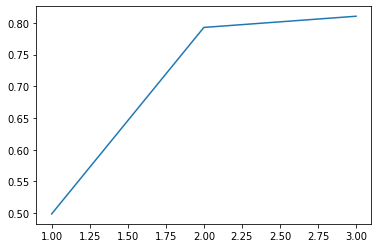

In [51]:
# parsing through each saved weights through the list, then loading the weights, scoring and plotting results.
filepath_checkpoint_folder = './cp.ckpt/'
list_auc_score = []
list_epoch = []
val_epoch = 0

for chkpt in list_checkpoints:
    filepath_chkpt = filepath_checkpoint_folder + chkpt

    model = keras.Sequential([keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(pp.train_sample.shape[-1],)),
                          keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001)),
                          keras.layers.Dropout(.5),
                          keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])

    model.compile(optimizer=keras.optimizers.Adam(lr=lr), loss=loss, metrics=metrics)
    
    model.load_weights(filepath_chkpt)
    
    predictions = model.predict(pp.test_sample, batch_size=10, verbose=0)
    rounded_predictions = model.predict_classes(pp.test_sample, batch_size=10, verbose=0)
    fpr, tpr, thresholds = roc_curve(pp.test_label, rounded_predictions, pos_label=1)
    auc_score = auc(fpr, tpr)
    list_auc_score.append(auc_score)
    val_epoch = val_epoch + 1
    print('epoch:', val_epoch, 'auc_score:', auc_score)    
    cm = confusion_matrix(pp.test_label, rounded_predictions)
    
list_epoch = []
for val in range(1,len(list_auc_score) + 1):
    list_epoch.append(val)

plt.plot(list_epoch, list_auc_score)

In [ ]:
# Final model - for non OOP dataset
list_auc_score = []
path_savedmodel = '/Users/krahman/work/tutorials/tensorflow_classification/saved_models_2/'
model = tf.keras.models.load_model(path_savedmodel)

predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)
fpr, tpr, thresholds = roc_curve(test_labels, rounded_predictions, pos_label=1)
auc_score = auc(fpr, tpr)
list_auc_score.append(auc_score)
# val_epoch = val_epoch + 1
print('auc_score:', auc_score)    
cm = confusion_matrix(test_labels, rounded_predictions)

In [ ]:
# TESTING
# creating Modelcheckpoint
checkpoint_path = "./cp.ckpt.testing2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_auc', 
                                                 verbose=1,
                                                 save_best_only=False, 
                                                 save_weights_only=True,
                                                 mode='max',
                                                 save_freq='epoch')


# creating model
epochs = 10
lr = .0001
metrics = [keras.metrics.AUC(name='auc'),
           keras.metrics.FalsePositives(name='fp'),
           keras.metrics.FalseNegatives(name='fn')]

model = keras.Sequential([keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(train_samples.shape[-1],)),
                          keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001),bias_regularizer=l2(0.0001)),
                          keras.layers.Dropout(.5),
                          keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])

# Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',
#       bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
#       activity_regularizer=None, kernel_constraint=None, bias_constraint=None
    
model.compile(optimizer=keras.optimizers.Adam(lr=lr), loss=loss, metrics=metrics)


# saving weights for checkpoints
model.save_weights(checkpoint_path.format(epoch=0))


# fitting model
model.fit(scaled_train_samples, train_labels, validation_data=(scaled_val_samples, val_labels), 
          batch_size=20, epochs=epochs, shuffle=True, verbose=2, workers=16, 
          use_multiprocessing=True,
          callbacks=[cp_callback])


# now that all epochs have completed, we will test load and test each weight. 
# parsing through folder with saved weights and selecting unique values with cp-0001 to cp-xxxx to create
# a list of all model weights to parse through for testing results against the test set. 
checkpoint_path = './cp.ckpt.testing2/'
list_checkpoints = []
for file in os.listdir(checkpoint_path):
    val_checkpoint = file[0:12]
    if file[0:3]=='cp-' and val_checkpoint not in list_checkpoints:
        list_checkpoints.append(val_checkpoint)
list_checkpoints.sort()


# parsing through each saved weights through the list, then loading the weights, scoring and plotting results.
filepath_checkpoint_folder = './cp.ckpt.testing2/'
list_auc_score = []
list_epoch = []
val_epoch = 0

for chkpt in list_checkpoints:
    filepath_chkpt = filepath_checkpoint_folder + chkpt

    model = keras.Sequential([keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(train_samples.shape[-1],)),
                              keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001)),
                              keras.layers.Dropout(.5),
                              keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])

    
    model.load_weights(filepath_chkpt)
    predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)
    rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)
    fpr, tpr, thresholds = roc_curve(test_labels, rounded_predictions, pos_label=1)
    auc_score = auc(fpr, tpr)
    list_auc_score.append(auc_score)
    val_epoch = val_epoch + 1
    print('epoch:', val_epoch, 'auc_score:', auc_score)    
    cm = confusion_matrix(test_labels, rounded_predictions)
    
list_epoch = []
for val in range(1,len(list_auc_score) + 1):
    list_epoch.append(val)
    
plt.plot(list_epoch, list_auc_score)

In [ ]:
# TESTING
# creating Modelcheckpoint
checkpoint_path = "./cp.ckpt.testing2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_auc', 
                                                 verbose=1,
                                                 save_best_only=False, 
                                                 save_weights_only=True,
                                                 mode='max',
                                                 save_freq='epoch')


# creating model
epochs = 10
lr = .0001
metrics = [keras.metrics.AUC(name='auc'),
           keras.metrics.FalsePositives(name='fp'),
           keras.metrics.FalseNegatives(name='fn')]

model = keras.Sequential([keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(train_samples.shape[-1],)),
                          keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001),
                                             bias_regularizer=l2(0.0001),
#                                              activity_regularizer=l2(0.0001),
#                                              kernel_constraint=l2(0.0001),
#                                              bias_constraint=l2(0.0001)
                                            ),
                          keras.layers.Dropout(.5),
                          keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])

# Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',
#       bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
#       activity_regularizer=None, kernel_constraint=None, bias_constraint=None
    
model.compile(optimizer=keras.optimizers.Adam(lr=lr), loss=loss, metrics=metrics)


# saving weights for checkpoints
model.save_weights(checkpoint_path.format(epoch=0))


# fitting model
model.fit(scaled_train_samples, train_labels, validation_data=(scaled_val_samples, val_labels), 
          batch_size=20, epochs=epochs, shuffle=True, verbose=2, workers=16, 
          use_multiprocessing=True,
          callbacks=[cp_callback])


# now that all epochs have completed, we will test load and test each weight. 
# parsing through folder with saved weights and selecting unique values with cp-0001 to cp-xxxx to create
# a list of all model weights to parse through for testing results against the test set. 
checkpoint_path = './cp.ckpt.testing2/'
list_checkpoints = []
for file in os.listdir(checkpoint_path):
    val_checkpoint = file[0:12]
    if file[0:3]=='cp-' and val_checkpoint not in list_checkpoints:
        list_checkpoints.append(val_checkpoint)
list_checkpoints.sort()


# parsing through each saved weights through the list, then loading the weights, scoring and plotting results.
filepath_checkpoint_folder = './cp.ckpt.testing2/'
list_auc_score = []
list_epoch = []
val_epoch = 0

for chkpt in list_checkpoints:
    filepath_chkpt = filepath_checkpoint_folder + chkpt

    model = keras.Sequential([keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(train_samples.shape[-1],)),
                              keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001),bias_regularizer=l2(0.0001)),
                              keras.layers.Dropout(.5),
                              keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])


    
    model.load_weights(filepath_chkpt)
    predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)
    rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)
    fpr, tpr, thresholds = roc_curve(test_labels, rounded_predictions, pos_label=1)
    auc_score = auc(fpr, tpr)
    list_auc_score.append(auc_score)
    val_epoch = val_epoch + 1
    print('epoch:', val_epoch, 'auc_score:', auc_score)    
    cm = confusion_matrix(test_labels, rounded_predictions)
    
list_epoch = []
for val in range(1,len(list_auc_score) + 1):
    list_epoch.append(val)
    
plt.plot(list_epoch, list_auc_score)

In [ ]:
# TESTING
# creating Modelcheckpoint
checkpoint_path = "./cp.ckpt.testing2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_auc', 
                                                 verbose=1,
                                                 save_best_only=False, 
                                                 save_weights_only=True,
                                                 mode='max',
                                                 save_freq='epoch')


# creating model
epochs = 55
lr = .0001
metrics = [keras.metrics.AUC(name='auc'),
           keras.metrics.FalsePositives(name='fp'),
           keras.metrics.FalseNegatives(name='fn')]

model = keras.Sequential([keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(train_samples.shape[-1],)),
                          keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001),
                                             bias_regularizer=l2(0.0001),
                                             activity_regularizer=l2(0.0001),
#                                              kernel_constraint=l2(0.0001),
#                                              bias_constraint=l2(0.0001)
                                            ),
                          keras.layers.Dropout(.5),
                          keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])

# Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',
#       bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
#       activity_regularizer=None, kernel_constraint=None, bias_constraint=None
    
model.compile(optimizer=keras.optimizers.Adam(lr=lr), loss=loss, metrics=metrics)


# saving weights for checkpoints
model.save_weights(checkpoint_path.format(epoch=0))


# fitting model
model.fit(scaled_train_samples, train_labels, validation_data=(scaled_val_samples, val_labels), 
          batch_size=20, epochs=epochs, shuffle=True, verbose=2, workers=16, 
          use_multiprocessing=True,
          callbacks=[cp_callback])


# now that all epochs have completed, we will test load and test each weight. 
# parsing through folder with saved weights and selecting unique values with cp-0001 to cp-xxxx to create
# a list of all model weights to parse through for testing results against the test set. 
checkpoint_path = './cp.ckpt.testing2/'
list_checkpoints = []
for file in os.listdir(checkpoint_path):
    val_checkpoint = file[0:12]
    if file[0:3]=='cp-' and val_checkpoint not in list_checkpoints:
        list_checkpoints.append(val_checkpoint)
list_checkpoints.sort()


# parsing through each saved weights through the list, then loading the weights, scoring and plotting results.
filepath_checkpoint_folder = './cp.ckpt.testing2/'
list_auc_score = []
list_epoch = []
val_epoch = 0

for chkpt in list_checkpoints:
    filepath_chkpt = filepath_checkpoint_folder + chkpt

    model = keras.Sequential([keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(train_samples.shape[-1],)),
                          keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001),
                                             bias_regularizer=l2(0.0001),
                                             activity_regularizer=l2(0.0001),
#                                              kernel_constraint=l2(0.0001),
#                                              bias_constraint=l2(0.0001)
                                            ),
                          keras.layers.Dropout(.5),
                          keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])


    
    model.load_weights(filepath_chkpt)
    predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)
    rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)
    fpr, tpr, thresholds = roc_curve(test_labels, rounded_predictions, pos_label=1)
    auc_score = auc(fpr, tpr)
    list_auc_score.append(auc_score)
    val_epoch = val_epoch + 1
    print('epoch:', val_epoch, 'auc_score:', auc_score)    
    cm = confusion_matrix(test_labels, rounded_predictions)
    
list_epoch = []
for val in range(1,len(list_auc_score) + 1):
    list_epoch.append(val)
    
plt.plot(list_epoch, list_auc_score)

In [ ]:
# TESTING
# creating Modelcheckpoint
checkpoint_path = "./cp.ckpt.testing2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_auc', 
                                                 verbose=1,
                                                 save_best_only=False, 
                                                 save_weights_only=True,
                                                 mode='max',
                                                 save_freq='epoch')


# creating model
epochs = 10
lr = .0001
metrics = [keras.metrics.AUC(name='auc'),
           keras.metrics.FalsePositives(name='fp'),
           keras.metrics.FalseNegatives(name='fn')]

model = keras.Sequential([keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(train_samples.shape[-1],)),
                          keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001),
                                             bias_regularizer=l2(0.0001),
                                             activity_regularizer=l2(0.0001),
#                                              kernel_constraint=l2(0.0001),
#                                              bias_constraint=l2(0.0001)
                                            ),
                          keras.layers.Dropout(.5),
                          keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])

# Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',
#       bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
#       activity_regularizer=None, kernel_constraint=None, bias_constraint=None
    
model.compile(optimizer=keras.optimizers.Adam(lr=lr), loss=loss, metrics=metrics)


# saving weights for checkpoints
model.save_weights(checkpoint_path.format(epoch=0))


# fitting model
model.fit(scaled_train_samples, train_labels, validation_data=(scaled_val_samples, val_labels), 
          batch_size=20, epochs=epochs, shuffle=True, verbose=2, workers=16, 
          use_multiprocessing=True,
          callbacks=[cp_callback])


# now that all epochs have completed, we will test load and test each weight. 
# parsing through folder with saved weights and selecting unique values with cp-0001 to cp-xxxx to create
# a list of all model weights to parse through for testing results against the test set. 
checkpoint_path = './cp.ckpt.testing2/'
list_checkpoints = []
for file in os.listdir(checkpoint_path):
    val_checkpoint = file[0:12]
    if file[0:3]=='cp-' and val_checkpoint not in list_checkpoints:
        list_checkpoints.append(val_checkpoint)
list_checkpoints.sort()


# parsing through each saved weights through the list, then loading the weights, scoring and plotting results.
filepath_checkpoint_folder = './cp.ckpt.testing2/'
list_auc_score = []
list_epoch = []
val_epoch = 0

for chkpt in list_checkpoints:
    filepath_chkpt = filepath_checkpoint_folder + chkpt

    model = keras.Sequential([keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(train_samples.shape[-1],)),
                          keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001),
                                             bias_regularizer=l2(0.0001),
                                             activity_regularizer=l2(0.0001),
#                                              kernel_constraint=l2(0.0001),
#                                              bias_constraint=l2(0.0001)
                                            ),
                          keras.layers.Dropout(.5),
                          keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])


    
    model.load_weights(filepath_chkpt)
    predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)
    rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)
    fpr, tpr, thresholds = roc_curve(test_labels, rounded_predictions, pos_label=1)
    auc_score = auc(fpr, tpr)
    list_auc_score.append(auc_score)
    val_epoch = val_epoch + 1
    print('epoch:', val_epoch, 'auc_score:', auc_score)    
    cm = confusion_matrix(test_labels, rounded_predictions)
    
list_epoch = []
for val in range(1,len(list_auc_score) + 1):
    list_epoch.append(val)
    
plt.plot(list_epoch, list_auc_score)

In [ ]:
# TESTING
# creating Modelcheckpoint
checkpoint_path = "./cp.ckpt.testing2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_auc', 
                                                 verbose=1,
                                                 save_best_only=False, 
                                                 save_weights_only=True,
                                                 mode='max',
                                                 save_freq='epoch')


# creating model
epochs = 10
lr = .0001
metrics = [keras.metrics.AUC(name='auc'),
           keras.metrics.FalsePositives(name='fp'),
           keras.metrics.FalseNegatives(name='fn')]

model = keras.Sequential([keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(train_samples.shape[-1],)),
                          keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001),
                                             bias_regularizer=l2(0.0001),
                                             activity_regularizer=l2(0.0001),
#                                              kernel_constraint=l2(0.0001),
#                                              bias_constraint=l2(0.0001)
                                            ),
                          keras.layers.Dropout(.5),
                          keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])

# Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',
#       bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
#       activity_regularizer=None, kernel_constraint=None, bias_constraint=None
    
model.compile(optimizer=keras.optimizers.Adam(lr=lr), loss=loss, metrics=metrics)


# saving weights for checkpoints
model.save_weights(checkpoint_path.format(epoch=0))


# fitting model
model.fit(scaled_train_samples, train_labels, validation_data=(scaled_val_samples, val_labels), 
          batch_size=20, epochs=epochs, shuffle=True, verbose=2, workers=16, 
          use_multiprocessing=True,
          callbacks=[cp_callback])


# now that all epochs have completed, we will test load and test each weight. 
# parsing through folder with saved weights and selecting unique values with cp-0001 to cp-xxxx to create
# a list of all model weights to parse through for testing results against the test set. 
checkpoint_path = './cp.ckpt.testing2/'
list_checkpoints = []
for file in os.listdir(checkpoint_path):
    val_checkpoint = file[0:12]
    if file[0:3]=='cp-' and val_checkpoint not in list_checkpoints:
        list_checkpoints.append(val_checkpoint)
list_checkpoints.sort()


# parsing through each saved weights through the list, then loading the weights, scoring and plotting results.
filepath_checkpoint_folder = './cp.ckpt.testing2/'
list_auc_score = []
list_epoch = []
val_epoch = 0

for chkpt in list_checkpoints:
    filepath_chkpt = filepath_checkpoint_folder + chkpt

    model = keras.Sequential([keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(train_samples.shape[-1],)),
                          keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.0001),
                                             bias_regularizer=l2(0.0001),
                                             activity_regularizer=l2(0.0001),
#                                              kernel_constraint=l2(0.0001),
#                                              bias_constraint=l2(0.0001)
                                            ),
                          keras.layers.Dropout(.5),
                          keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)])


    
    model.load_weights(filepath_chkpt)
    predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)
    rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)
    fpr, tpr, thresholds = roc_curve(test_labels, rounded_predictions, pos_label=1)
    auc_score = auc(fpr, tpr)
    list_auc_score.append(auc_score)
    val_epoch = val_epoch + 1
    print('epoch:', val_epoch, 'auc_score:', auc_score)    
    cm = confusion_matrix(test_labels, rounded_predictions)
    
list_epoch = []
for val in range(1,len(list_auc_score) + 1):
    list_epoch.append(val)
    
plt.plot(list_epoch, list_auc_score)